In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv2D, Input, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [2]:
X_train = np.load(r"C:\Users\asus\Desktop\spectrograms\data\X_train.npy")
X_test = np.load(r"C:\Users\asus\Desktop\spectrograms\data\X_test.npy")
y_train = np.load(r"C:\Users\asus\Desktop\spectrograms\data\y_train.npy")
y_test = np.load(r"C:\Users\asus\Desktop\spectrograms\data\y_test.npy")
X_val = np.load(r"C:\Users\asus\Desktop\spectrograms\data\X_val.npy")
y_val = np.load(r"C:\Users\asus\Desktop\spectrograms\data\y_val.npy")

In [3]:
y_train.shape

(5238, 10)

In [4]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_CHANNELS = 1
num_labels = y_train.shape[1]

In [12]:
inputs = Input((IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
x = Conv2D(8, kernel_size=(7,7), activation='tanh', padding='same', name='conv2d_tanh')(inputs)
x = MaxPooling2D(pool_size=(2,2), padding='same', name='max_pool_2d_1')(x)
x = Conv2D(16, kernel_size=(5,5), activation='relu', padding='same', name='conv2d_relu_1')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same', name='max_pool_2d_2')(x)
x = Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_relu_2')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same', name='max._pool_2d_3')(x)
x = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_relu_3')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same', name='max_pool_2d_4')(x)
x = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_relu_4')(x)
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.2, name='dropout')(x)
x = Dense(64, activation='relu')(x)
o = Dense(num_labels, activation='softmax')(x)
model = Model(inputs=inputs, outputs=o, name='2d_convolution')

In [13]:
model.summary()

Model: "2d_convolution"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_tanh (Conv2D)        (None, 128, 128, 8)       400       
                                                                 
 max_pool_2d_1 (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_relu_1 (Conv2D)      (None, 64, 64, 16)        3216      
                                                                 
 max_pool_2d_2 (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_relu_2 (Conv2D)      (None, 32, 32, 16)     

In [14]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [15]:
EPOCHS = 25
BATCH_SIZE  = 32

In [16]:
history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data=(X_val, y_val), 
                    steps_per_epoch= 100)

Epoch 1/25
100/100 [==============================] - 4s 34ms/step - loss: 1.6725 - accuracy: 0.3797 - val_loss: 1.4210 - val_accuracy: 0.5220
Epoch 2/25
100/100 [==============================] - 3s 29ms/step - loss: 1.2415 - accuracy: 0.5677 - val_loss: 1.1207 - val_accuracy: 0.6463
Epoch 3/25
100/100 [==============================] - 3s 28ms/step - loss: 0.9813 - accuracy: 0.6647 - val_loss: 1.0080 - val_accuracy: 0.6795
Epoch 4/25
100/100 [==============================] - 3s 28ms/step - loss: 0.7774 - accuracy: 0.7480 - val_loss: 0.8880 - val_accuracy: 0.7172
Epoch 5/25
100/100 [==============================] - 3s 29ms/step - loss: 0.7454 - accuracy: 0.7549 - val_loss: 0.8077 - val_accuracy: 0.7527
Epoch 6/25
100/100 [==============================] - 3s 28ms/step - loss: 0.6355 - accuracy: 0.7809 - val_loss: 0.7548 - val_accuracy: 0.7865
Epoch 7/25
100/100 [==============================] - 3s 28ms/step - loss: 0.5772 - accuracy: 0.8144 - val_loss: 0.6412 - val_accuracy: 0.8140

Text(0.5, 1.0, 'Training and Validation Accuracy')

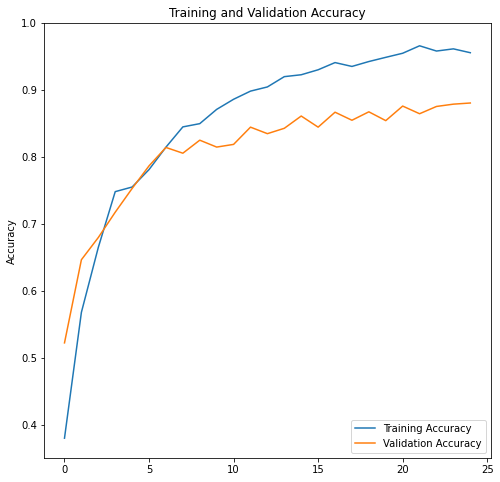

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy :', accuracy)

55/55 [==============================] - 1s 15ms/step - loss: 0.5009 - accuracy: 0.8838
Test accuracy : 0.8838008046150208
